In [1]:
import sys
sys.path.insert(0,'./src/')
from pipe import *
from utils import *
from matplotlib import pyplot as plt

In [2]:
scale = 1

In [3]:
l1 = pt(-5,0)
l2 = pt(4,-3)
l3 = pt(4,3)
ls = np.array([l1,l2,l3])/scale
rs = np.array([1,1,1])
pipe = NLets(ls,rs)
shift1 = np.array([0,0])

In [4]:
pipe.build_geometry(max_distance=0.01,legendre_ratio=1e-6 ,n_jobs=4)

In [5]:
pipe.n_pts

8448

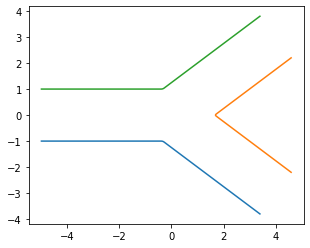

In [6]:
fig, ax = plt.subplots()
for bdr in pipe.open_bdr:
    ax.plot(*bdr.T)
ax.set_aspect('equal')

In [7]:
pipe.build_A()

In [8]:
pipe.build_omegas(n_jobs=4)
# pipe.build_pressure_drops()
pipe.A = None

In [44]:
pipe.build_plotting_data(density=50,h_mult=4)

In [45]:
t = pipe.t
x = t.real
y = t.imag
xs = pipe.xs
ys = pipe.ys

In [46]:
# vmin = np.min(pipe.u_fields[0])
# vmax = np.max(pipe.u_fields[0])

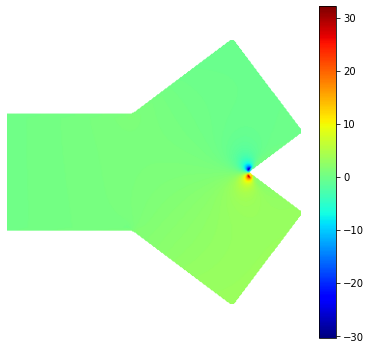

In [60]:
l,r,u,b = pipe.extent
fig, ax = plt.subplots(figsize=((r-l),(b-u)))
ax.set_aspect('equal')
im = ax.scatter(pipe.xs,pipe.ys,c=pipe.pressure_fields[0],s=1,cmap='jet')
# ax.scatter(xs[nearboundary],ys[nearboundary],c=u,s=0.8,vmin=vmin,vmax=vmax)
# im = ax.scatter(xs[nearboundary][np.isnan(u)],ys[nearboundary][np.isnan(u)],c=u2,s=0.8,vmin=vmin,vmax=vmax)
# ax.scatter(x,y,c='black',s=.1)
fig.colorbar(im)
ax.set_axis_off()
ax.margins(0)
fig.subplots_adjust(left=0,right=1,bottom=0,top=1)

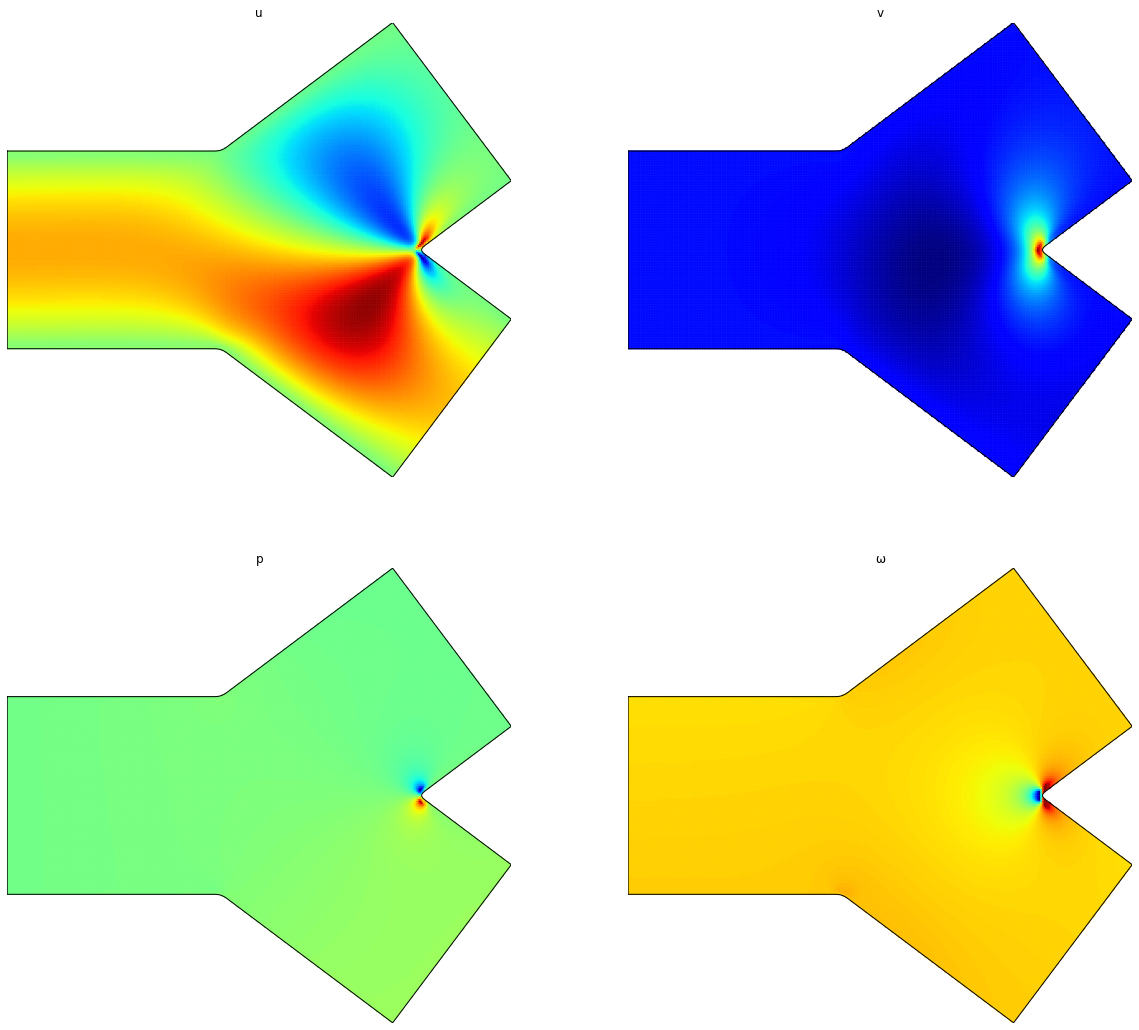

In [58]:
fig,axes = plt.subplots(2,2,figsize=(4*(r-l),4*(b-u)))
for ax,fields,name in zip(axes.flatten(),(pipe.u_fields,pipe.v_fields,pipe.pressure_fields,pipe.vorticity_fields),'uvpω'):
    ax.set_aspect('equal')
    ax.scatter(pipe.xs,pipe.ys,c=fields[0],s=2,cmap='jet', vmin=np.min(fields[0]),vmax=np.max(fields[0]))
    ax.plot(*(pipe.closed_boundary.T),c='black',linewidth=1)
    ax.title.set_text(name)
    ax.set_axis_off()
    ax.margins(0)

I should use scatter plot instead of imshow to plot all the datas. 